# Navigating Through Turbulence: A Data-Driven Examination of Global Economic Resilience and Recovery Post-COVID-19

## Introduction and Background

Economic growth, as measured by Gross Domestic Product (GDP), is one of the most closely monitored indicators of a country's economic performance. It reflects the total dollar value of all goods and services produced over a specific time period and is used to gauge the health of a nation's economy. It has profound implications for employment, poverty, revenue generation, and overall living standards.

In this project, I delve into the GDP growth rates of various countries over the past decades, sourced from the World Bank, a vital repository of international economic data. The World Bank's datasets are comprehensive, covering a wide range of economic indicators that provide insights into global economic trends and are therefore instrumental for policymakers, economists, and researchers.

The objective of this analysis is multifaceted. I aim to uncover patterns and trends in global economic growth, identify which regions of the world have experienced the highest growth, and understand the impact of significant global events such as the 2008 financial crisis and the COVID-19 pandemic on GDP growth rates.

By examining data spanning from 2014 to 2022, I can observe not only the immediate effects of these events but also the recovery patterns in the following years. This period is particularly significant as it encapsulates a time of rapid technological change, increasing globalization, as well as unprecedented challenges that have tested the resilience and adaptability of economies worldwide.

Through a series of exploratory data analyses, visualizations, and statistical examinations, I will provide a narrative that tells the story of global economic growth in the modern era, highlighting the triumphs and tribulations faced by nations as they navigate through periods of boom and recession.

As the world becomes increasingly interconnected, understanding the dynamics of GDP growth is more essential than ever for anticipating future developments and formulating strategies that promote sustainable economic prosperity.

With this project, I contribute to a deeper understanding of the world's economic landscape, offering insights that may inform decisions at the levels of policy and individual enterprises alike.

## Understanding the Dataset
My dataset will be taken from the World Bank ([https://data.worldbank.org/](https://data.worldbank.org/)) - [Here](https://data.worldbank.org/indicator/NY.GDP.MKTP.KD.ZG) is to download for this 👇.

My analysis will focus on GDP growth rates, a crucial economic indicator reflecting the health and progress of economies worldwide. The dataset, sourced from the World Bank, encompasses GDP growth percentages for 266 countries spanning from 1960 to 2022. Our objective is to scrutinize the last five years of this dataset, from 2014 to 2022, to unravel the recent trends in GDP growth across the globe. Through this analysis, we aim to answer key questions concerning economic development patterns, the impact of global events on economies, and to compare the growth trajectories of different regions. The insights gathered will be depicted through comprehensive visualizations,  to get the answers for the following points and plot the results:

List all countries where GDP growth was greater than or equal to 10% in 2022.

List all countries where GDP growth was less than or equal to 0% in 2022.

Identify the top 10 countries with the highest average GDP growth rate from 2014 to 2022.

Identify the top 10 countries with the lowest average GDP growth rate from 2014 to 2022.

Determine the top 10 countries with the greatest decrease in GDP growth from 2019 to 2020, indicating a high impact from the COVID-19 pandemic.

Determine the top 10 countries with the smallest decrease or an increase in GDP growth from 2019 to 2020, indicating a low impact from the COVID-19 pandemic.

How did countries' GDP growth rates in 2021 compare to pre-pandemic levels in 2019, indicating economic recovery?

What is the distribution of GDP growth rates across all countries in the most recent year available? Identify the median, quartiles, and any outliers.

## Importing the dataset into DataFrame:

In [119]:
import zipfile
with zipfile.ZipFile('API_NY.GDP.MKTP.KD.ZG_DS2_en_csv_v2_5994650.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
gdp_df = pd.read_csv('API_NY.GDP.MKTP.KD.ZG_DS2_en_csv_v2_5994650.csv', skiprows=4)

Firstly, I import essential libraries: pandas for data manipulation and matplotlib.pyplot for plotting. Then, I load our GDP dataset from a CSV file into a Pandas DataFrame, using the read_csv function and skipping the first four rows which do not contain data relevant to our analysis.

### Summary of the DataFrame:
The method info() will give me information about the number of entries, the number of non-null entries per column, and the data type of each column.

In [121]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            0 non-null      float64
 5   1961            123 non-null    float64
 6   1962            128 non-null    float64
 7   1963            128 non-null    float64
 8   1964            128 non-null    float64
 9   1965            128 non-null    float64
 10  1966            136 non-null    float64
 11  1967            139 non-null    float64
 12  1968            140 non-null    float64
 13  1969            143 non-null    float64
 14  1970            140 non-null    float64
 15  1971            154 non-null    float64
 16  1972            154 non-null    float64
 17  1973            154 non-null    flo

### Statistical Summary:

This provides descriptive statistics that summarize the central tendency, dispersion, and shape of the dataset’s distribution, excluding NaN values.

In [122]:
gdp_df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
count,0.0,123.000000,128.000000,128.000000,128.000000,128.000000,136.000000,139.000000,140.000000,143.000000,...,257.000000,256.000000,255.000000,256.000000,257.000000,256.000000,256.000000,251.000000,233.000000,0.0
mean,NaN,3.326558,5.031957,4.903762,6.306210,5.265293,4.617273,4.081531,5.929365,6.870969,...,3.319004,2.719211,3.092503,3.227590,3.103274,2.829215,-4.676170,5.255613,4.063898,NaN
std,NaN,5.870265,4.654893,5.106995,4.403259,4.359565,4.378798,7.133512,7.466652,4.752364,...,3.441762,4.408558,3.565580,3.689373,2.854400,3.246443,7.801989,5.574152,5.880826,NaN
min,NaN,-27.270000,-19.685042,-12.278657,-12.464993,-12.481834,-7.659066,-15.743628,-5.474906,-6.554143,...,-23.042806,-27.994546,-10.783238,-6.987578,-19.268850,-11.320755,-54.235900,-20.700000,-29.100000,NaN
25%,NaN,1.227822,3.229236,3.281923,4.523873,3.156900,1.668275,1.616100,2.976038,4.476422,...,1.619394,1.380466,1.640859,1.748744,1.783349,1.220760,-7.190310,3.049548,2.562394,NaN
50%,NaN,4.195217,4.905900,5.199236,6.472530,5.345650,4.806841,4.200000,5.197788,6.275867,...,3.384078,2.938138,3.039825,3.171842,3.002930,2.593208,-3.687150,4.988850,3.751103,NaN
75%,NaN,6.163989,6.843479,7.293660,7.963647,7.032147,7.016844,6.236611,7.375755,9.375403,...,5.223136,4.480316,4.676118,4.817188,4.843087,4.526691,-1.204426,7.250000,5.565860,NaN
max,NaN,14.766843,24.521297,34.313729,27.690886,17.035712,19.200000,66.219084,81.887797,25.666169,...,15.217391,24.370445,29.212121,32.491802,8.539836,23.513793,43.479556,41.745101,57.800220,NaN


## Exploring, selecting, cleaning, and preparing the data:

###  a. See the columns:

In [123]:
gdp_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       'Unnamed: 67'],
      dtype='object')

In the above coding snippet, I used the data,columns to get all columns from the dataframe data.

 ### b. Display the top 5 rows from the DataFrame data:

In [124]:
gdp_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.020479,3.543630,2.116716,5.482371,5.257855,0.635030,-18.589099,17.172509,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,0.254879,7.965825,5.148217,4.579328,5.346210,...,3.994682,2.974101,2.224524,2.546973,2.513984,2.087765,-2.888681,4.334927,3.404852,NaN
2,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,2.724543,1.451315,2.260314,2.647003,1.189228,3.911603,-2.351101,-20.700000,NaN,NaN
3,Africa Western and Central,AFW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,1.854872,3.772845,7.278612,5.410812,4.081666,...,5.929463,2.750042,0.125435,2.313219,2.813142,3.212407,-0.927800,3.980848,3.762758,NaN
4,Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,4.822559,0.943572,-2.580111,-0.147150,-1.316362,-0.702273,-5.638215,1.199211,3.045403,NaN


In the above coding snippet, I used the method head() to display the top five rows of the DataFrame data.

  ### c. Display the last five rows from the data frame data:

In [125]:
gdp_df.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
261,Kosovo,XKX,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,3.348804,5.916270,5.571757,4.825690,3.406631,4.756831,-5.340275,10.745612,3.511707,NaN
262,"Yemen, Rep.",YEM,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.188690,-27.994546,-9.375124,-5.071796,0.752448,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,3.844734,6.177931,7.373709,7.939609,6.122798,...,1.413826,1.321862,0.664552,1.157947,1.522329,0.303453,-6.342471,4.913097,2.042299,NaN
264,Zambia,ZMB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,1.361382,-2.490839,3.272393,12.214048,16.647456,...,4.697992,2.920375,3.776679,3.504336,4.034494,1.441306,-2.785055,4.598734,4.744942,NaN
265,Zimbabwe,ZWE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,6.316157,1.434471,6.244345,-1.106172,4.910571,...,1.484543,2.023650,0.900955,4.080264,5.009867,-6.332446,-7.816951,8.468017,3.400000,NaN


In the following coding snippet, I used the method tail() to display the top five rows of the DataFrame data.

 ### d. Display the shape of the DataFrame (rows and columns):

In [126]:
gdp_df.shape

(266, 68)

I used gdp_df.shape() to display the shape of the DataFrame data; it has 266 rows and 68 columns.

### e. Check for null values to start data cleaning

In [127]:
years_of_interest = list(map(str, range(2014, 2023)))
gdp_subset = gdp_df[['Country Name', 'Country Code'] + years_of_interest]
gdp_subset[years_of_interest].isnull().sum()

2014     9
2015    10
2016    11
2017    10
2018     9
2019    10
2020    10
2021    15
2022    33
dtype: int64

### f. Dropping the rows with null values.

In [128]:
gdp_subset = gdp_subset.dropna(subset=['2022'])
gdp_subset[years_of_interest].isnull().sum()

2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
2020    0
2021    0
2022    0
dtype: int64

In the data cleaning process, I identified and dropped rows with missing GDP growth data for the year 2022, ensuring the robustness of my subsequent analyses. And we can see no null present after dropping the null rows from the DataFrame.

### g. Check for the duplicates:

In the following coding snippet, I have checked for duplicates and found that there is no duplicate data present:



In [129]:
gdp_subset.duplicated().sum()

0

### h. Checking the datatypes of the columns

In the following coding snippet, I printed the data types for all columns in the DataFrame:

In [130]:
gdp_subset.dtypes

Country Name     object
Country Code     object
2014            float64
2015            float64
2016            float64
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
2022            float64
dtype: object

### i. Sorting the DataFrame:
  

In the following coding snippet, I sorted the data frame on the column Country Name:

In [131]:
gdp_subset.sort_values('Country Name')

,Country Name,Country Code,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,Africa Eastern and Southern,AFE,3.994682,2.974101,2.224524,2.546973,2.513984,2.087765,-2.888681,4.334927,3.404852
3,Africa Western and Central,AFW,5.929463,2.750042,0.125435,2.313219,2.813142,3.212407,-0.927800,3.980848,3.762758
5,Albania,ALB,1.774449,2.218726,3.314981,3.802599,4.019346,2.087712,-3.302082,8.908528,4.844236
60,Algeria,DZA,3.800000,3.700000,3.200000,1.300000,1.200000,1.000000,-5.100000,3.400000,3.100000
6,Andorra,AND,2.504466,1.434140,3.709678,0.346072,1.588765,2.015548,-11.183940,8.287200,8.809579
...,...,...,...,...,...,...,...,...,...,...,...
257,Viet Nam,VNM,6.422247,6.987167,6.690009,6.940188,7.464991,7.359281,2.865412,2.561551,8.019798
196,West Bank and Gaza,PSE,-0.157867,3.721300,8.864619,1.419368,1.227077,1.362687,-11.318466,7.011982,3.932977
259,World,WLD,3.073531,3.082937,2.808631,3.389865,3.288050,2.594550,-3.072225,6.023813,3.080322
264,Zambia,ZMB,4.697992,2.920375,3.776679,3.504336,4.034494,1.441306,-2.785055,4.598734,4.744942


### j. Setting the index :

I set the Country Code column as an index in the following coding snippet:

In [132]:
gdp_subset.set_index('Country Code', inplace=True)
gdp_subset

,Country Name,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country Code,,,,,,,,,,
AFE,Africa Eastern and Southern,3.994682,2.974101,2.224524,2.546973,2.513984,2.087765,-2.888681,4.334927,3.404852
AFW,Africa Western and Central,5.929463,2.750042,0.125435,2.313219,2.813142,3.212407,-0.927800,3.980848,3.762758
AGO,Angola,4.822559,0.943572,-2.580111,-0.147150,-1.316362,-0.702273,-5.638215,1.199211,3.045403
ALB,Albania,1.774449,2.218726,3.314981,3.802599,4.019346,2.087712,-3.302082,8.908528,4.844236
AND,Andorra,2.504466,1.434140,3.709678,0.346072,1.588765,2.015548,-11.183940,8.287200,8.809579
...,...,...,...,...,...,...,...,...,...,...
WSM,Samoa,0.659924,3.850362,7.983863,1.406282,-0.609647,4.451859,-3.108444,-7.084588,-6.022011
XKX,Kosovo,3.348804,5.916270,5.571757,4.825690,3.406631,4.756831,-5.340275,10.745612,3.511707
ZAF,South Africa,1.413826,1.321862,0.664552,1.157947,1.522329,0.303453,-6.342471,4.913097,2.042299


### k. Adding two new columns, avg_growth_2014_2022 and growth_diff_2019_2020 :

In [133]:
gdp_subset['avg_growth_2014_2022'] = gdp_subset[['2014','2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']].mean(axis=1)
gdp_subset

,Country Name,2014,2015,2016,2017,2018,2019,2020,2021,2022,avg_growth_2014_2022
Country Code,,,,,,,,,,,
AFE,Africa Eastern and Southern,3.994682,2.974101,2.224524,2.546973,2.513984,2.087765,-2.888681,4.334927,3.404852,2.354792
AFW,Africa Western and Central,5.929463,2.750042,0.125435,2.313219,2.813142,3.212407,-0.927800,3.980848,3.762758,2.662168
AGO,Angola,4.822559,0.943572,-2.580111,-0.147150,-1.316362,-0.702273,-5.638215,1.199211,3.045403,-0.041485
ALB,Albania,1.774449,2.218726,3.314981,3.802599,4.019346,2.087712,-3.302082,8.908528,4.844236,3.074277
AND,Andorra,2.504466,1.434140,3.709678,0.346072,1.588765,2.015548,-11.183940,8.287200,8.809579,1.945723
...,...,...,...,...,...,...,...,...,...,...,...
WSM,Samoa,0.659924,3.850362,7.983863,1.406282,-0.609647,4.451859,-3.108444,-7.084588,-6.022011,0.169733
XKX,Kosovo,3.348804,5.916270,5.571757,4.825690,3.406631,4.756831,-5.340275,10.745612,3.511707,4.082558
ZAF,South Africa,1.413826,1.321862,0.664552,1.157947,1.522329,0.303453,-6.342471,4.913097,2.042299,0.777433


Average GDP Growth (2014-2022): A new column, avg_growth_2014_2022, has been created to show the average annual GDP growth rate for each country across the years 2014 to 2022. This average provides a snapshot of each country's economic performance over this period.

In [134]:
gdp_subset['growth_diff_2019_2020'] = gdp_subset['2020'] - gdp_subset['2019']
gdp_subset

,Country Name,2014,2015,2016,2017,2018,2019,2020,2021,2022,avg_growth_2014_2022,growth_diff_2019_2020
Country Code,,,,,,,,,,,,
AFE,Africa Eastern and Southern,3.994682,2.974101,2.224524,2.546973,2.513984,2.087765,-2.888681,4.334927,3.404852,2.354792,-4.976446
AFW,Africa Western and Central,5.929463,2.750042,0.125435,2.313219,2.813142,3.212407,-0.927800,3.980848,3.762758,2.662168,-4.140207
AGO,Angola,4.822559,0.943572,-2.580111,-0.147150,-1.316362,-0.702273,-5.638215,1.199211,3.045403,-0.041485,-4.935942
ALB,Albania,1.774449,2.218726,3.314981,3.802599,4.019346,2.087712,-3.302082,8.908528,4.844236,3.074277,-5.389794
AND,Andorra,2.504466,1.434140,3.709678,0.346072,1.588765,2.015548,-11.183940,8.287200,8.809579,1.945723,-13.199488
...,...,...,...,...,...,...,...,...,...,...,...,...
WSM,Samoa,0.659924,3.850362,7.983863,1.406282,-0.609647,4.451859,-3.108444,-7.084588,-6.022011,0.169733,-7.560303
XKX,Kosovo,3.348804,5.916270,5.571757,4.825690,3.406631,4.756831,-5.340275,10.745612,3.511707,4.082558,-10.097106
ZAF,South Africa,1.413826,1.321862,0.664552,1.157947,1.522329,0.303453,-6.342471,4.913097,2.042299,0.777433,-6.645924


GDP Growth Difference (2019-2020): Another column, growth_diff_2019_2020, has been calculated to reflect the change in GDP growth from 2019 to 2020 for each country. This column is crucial for understanding the impact of the COVID-19 pandemic on the economies, as a significant decrease could indicate a strong negative impact of the pandemic on a country's economy.

### l. Plotting the Avg GDP Growth From 2014 to 2022 data:

The following is the coding snippet used to generate a bar graph that displays the average GDP growth rate from 2014 to 2022 for all countries listed. On the x-axis, we have the countries, and on the y-axis, the average GDP growth rate is plotted. This visualization aids in comparing the economic performance of countries over the specified period.

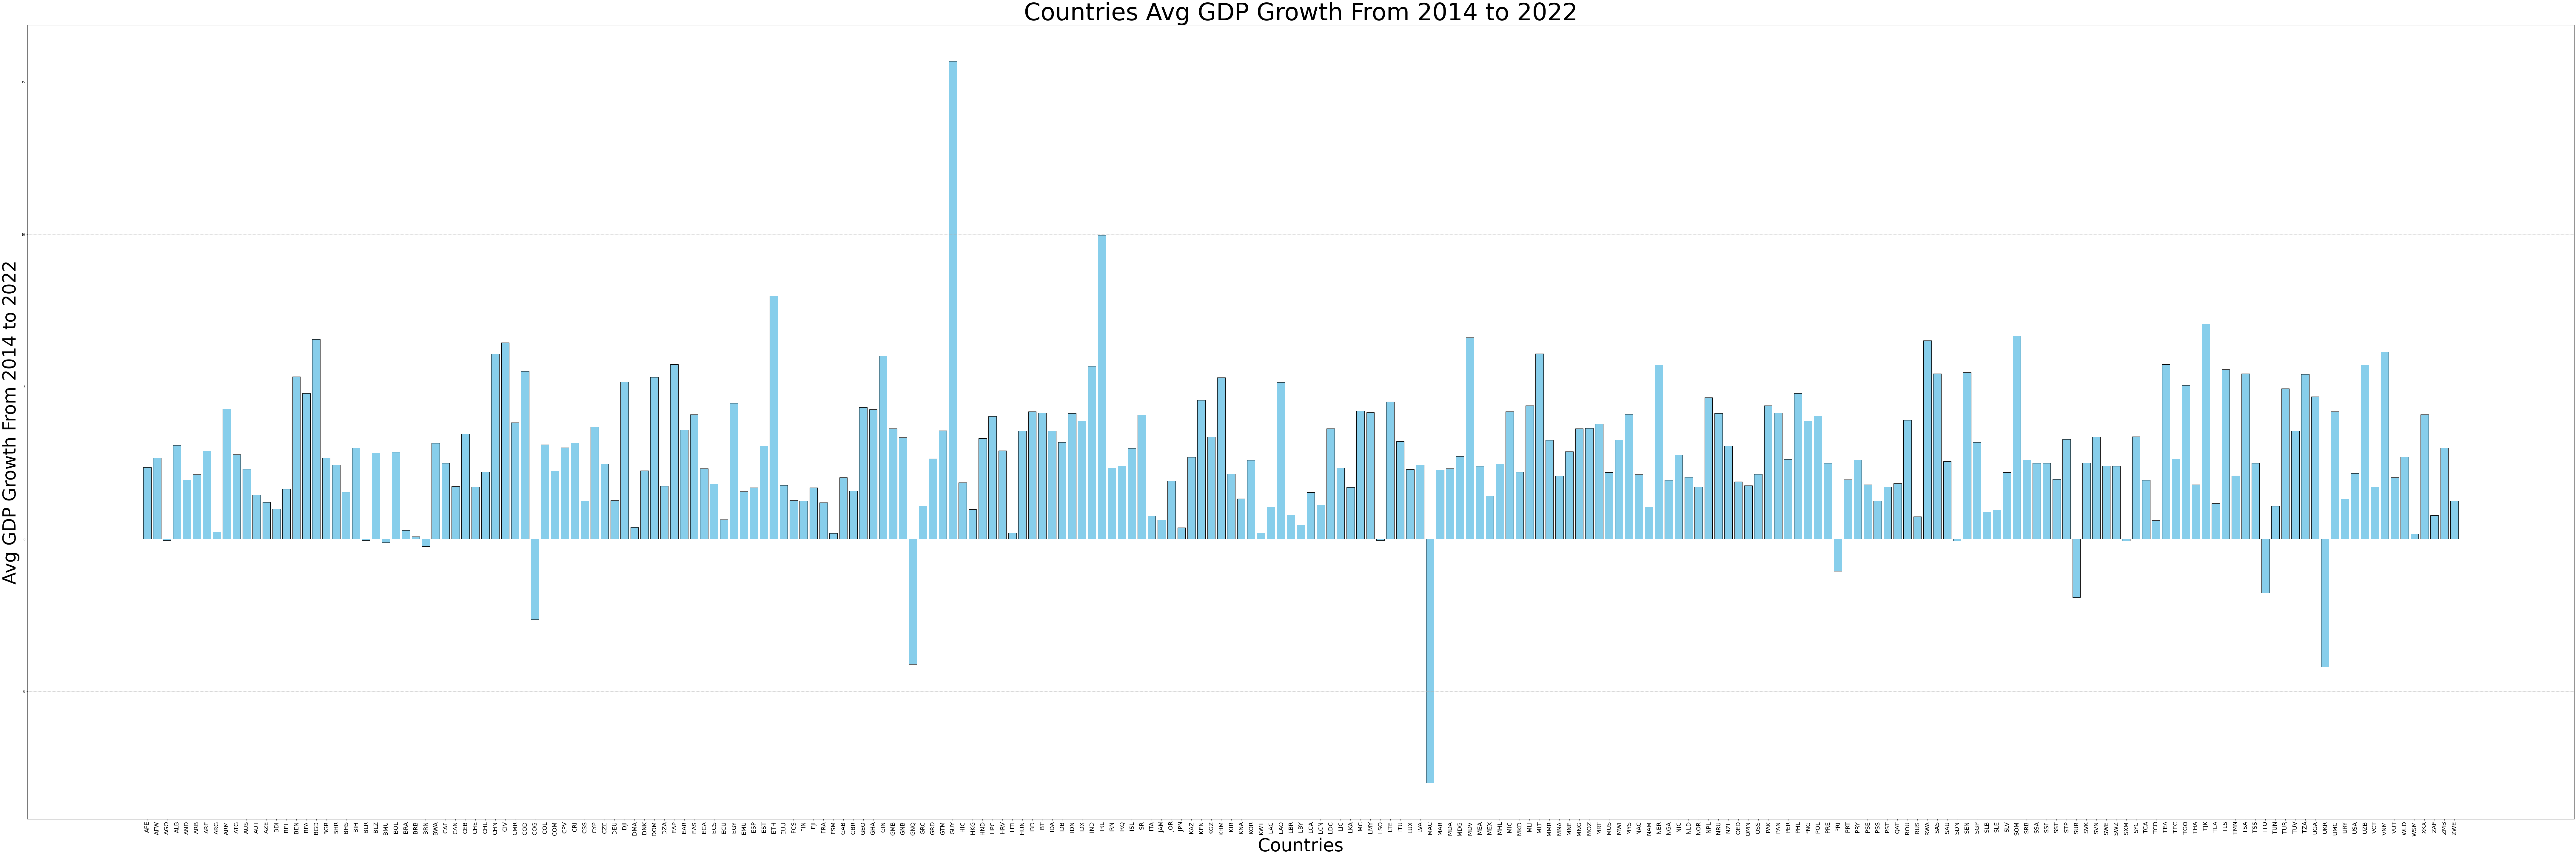

In [135]:
import matplotlib.pyplot as pit
avg_growth = gdp_subset['avg_growth_2014_2022']
countries = list(gdp_subset.index)
fig,ax = plt. subplots(nrows=1,ncols=1,figsize=(120,40))

ax.bar(countries, avg_growth, color='skyblue', edgecolor='black')

pit.xlabel('Countries', fontsize=60)
plt.ylabel('Avg GDP Growth From 2014 to 2022', fontsize=60) 
pit.xticks(rotation=90,fontsize=20)
pit.title("Countries Avg GDP Growth From 2014 to 2022",fontsize=80)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

I have prepared a complete data frame for the analysis task.

## Performing the data analysis and plotting the summary of them:

Now, I have prepared a complete data frame ready for the subsequent analysis task.

 ### a. List all countries where GDP growth was greater than or equal to 10% in 2022.
    In the following coding, I have tried to select all records with an GDP growth rate of more than or equal 10%: so we got thirteen countries under this condition:

In [136]:
high_growth_2022 = gdp_subset[gdp_subset['2022'] >= 10][['Country Name','2022']]                      
high_growth_2022

,Country Name,2022
Country Code,,
ARM,Armenia,12.600000
BHS,"Bahamas, The",14.368960
BLZ,Belize,12.128745
CPV,Cabo Verde,17.714181
CSS,Caribbean small states,12.567807
FJI,Fiji,16.124851
GEO,Georgia,10.108720
GUY,Guyana,57.800220
IRL,Ireland,11.969580


I've conducted an analysis to spotlight countries with robust economic growth, defining high growth as a GDP growth rate equal to or exceeding 10% in 2022. The code snippet extracts such records from our dataset, and the output displays these high-growth economies. A brief analysis of the output reveals a mix of countries, some of which are smaller economies or developing nations, potentially indicating that they are starting from a lower base GDP or are experiencing rapid industrialization or investment influxes in recent years.

### b. List all countries where GDP growth was less than or equal to 0% in 2022.
    In the following coding, I have tried to select all records with an gdp growth rate less than or equal to 0 %: so we got eighteen countries under this condition:

In [137]:
low_growth_2022 = gdp_subset[gdp_subset['2022'] <= 0][['Country Name','2022']]                      
low_growth_2022

,Country Name,2022
Country Code,,
BLR,Belarus,-4.697450
BRN,Brunei Darussalam,-1.628332
CAF,Central African Republic,0.000000
EST,Estonia,-1.287411
FSM,"Micronesia, Fed. Sts.",-0.619575
HKG,"Hong Kong SAR, China",-3.476330
HTI,Haiti,-1.681984
LBY,Libya,-1.236982
LKA,Sri Lanka,-7.823977


The output reveals a diverse set of countries across different continents with non-positive GDP growth rates in 2022. Notably, some countries like Sri Lanka, Macao SAR, and Ukraine show significantly negative growth rates, which could be due to various factors including political instability, economic sanctions, or the impacts of the COVID-19 pandemic. On the other hand, countries like the Central African Republic have a zero growth rate, which might indicate an economy that is neither growing nor shrinking.

### c. Identify the top 10 countries with the highest average GDP growth rate from 2014 to 2022.

 In the following coding snippet, I have the first sort of the data for column avg_growth_2014_2022 in descending order, which means the highest value at the top. I sliced the top ten rows from this, and this way, I got the top 10 countries with a high average gdp growth rate from 2014 to 2022.

In [138]:
top_countries_by_avg_growth = gdp_subset.nlargest(10, 'avg_growth_2014_2022')
top_countries_by_avg_growth

,Country Name,2014,2015,2016,2017,2018,2019,2020,2021,2022,avg_growth_2014_2022,growth_diff_2019_2020
Country Code,,,,,,,,,,,,
GUY,Guyana,1.686028,0.687521,3.807919,3.734374,4.441014,5.352627,43.479556,20.060011,57.800220,15.672141,38.126929
IRL,Ireland,8.649351,24.370445,2.006654,9.005342,8.527541,5.440937,6.184538,13.588247,11.969580,9.971404,0.743601
ETH,Ethiopia,10.257493,10.392463,9.433483,9.564190,6.816148,8.364086,6.059531,5.641531,5.317096,7.982891,-2.304555
TJK,Tajikistan,6.700001,6.019303,6.900000,7.100000,7.600000,7.400000,4.400000,9.400000,8.000000,7.057700,-3.000000
SOM,Somalia,7.794200,15.049941,8.532293,2.349583,7.530969,7.456522,2.489374,4.049110,4.798779,6.672308,-4.967147
MDV,Maldives,7.329626,2.884549,6.338301,7.209910,8.123129,7.097466,-33.492796,41.745101,12.299486,6.614975,-40.590262
BGD,Bangladesh,6.061059,6.552640,7.113478,6.590250,7.319413,7.881907,3.448026,6.938679,7.099829,6.556142,-4.433881
RWA,Rwanda,6.167163,8.856847,5.970757,3.936611,8.539836,9.464025,-3.373986,10.876734,8.157488,6.510608,-12.838012
CIV,Cote d'Ivoire,9.372000,7.194949,7.172760,7.410762,4.843146,6.518287,1.737620,7.000000,6.741330,6.443428,-4.780666


The data shows that Guyana leads this list with a significant average growth rate, which might be attributed to recent developments in sectors such as oil production. Other countries like Ireland, Ethiopia, and Tajikistan also show strong average growth, reflecting diverse economic dynamics that could include technology-driven growth, agricultural development, and strategic geographic positioning for trade, respectively.

#### In the following coding snippet, the plot of the top 10 countries with a high gdp growth rate from 2014 to 2022 is shown:

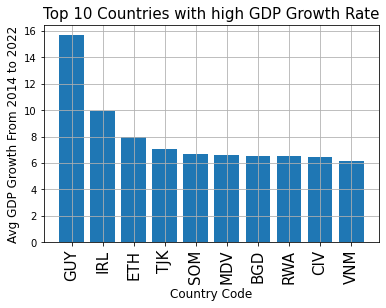

In [139]:
import matplotlib.pyplot as plt
gdpg = top_countries_by_avg_growth['avg_growth_2014_2022']
countries = list(top_countries_by_avg_growth.index)

fig,ax = plt.subplots(nrows=1,ncols=1)

ax.bar (countries,gdpg)

plt.xlabel('Country Code', fontsize=12) 
plt.ylabel('Avg GDP Growth From 2014 to 2022' , fontsize=12) 
plt.xticks(rotation= 'vertical',fontsize=15)
plt.title("Top 10 Countries with high GDP Growth Rate" ,fontsize=15)

ax.grid()
plt.show()

### d. Identify the top 10 countries with the lowest average GDP growth rate from 2014 to 2022.

In the following coding snippet, I have the first sort of the data for column avg_growth_2014_2022 in ascending order, which means the lowest value at the top. Then, I sliced the top ten rows from this, and this way, we have got the information about top ten countries that have an average low rate of gdp growth from 2014 to 2022.

In [140]:
bottom_countries_by_avg_growth = gdp_subset.nsmallest(10, 'avg_growth_2014_2022')
bottom_countries_by_avg_growth

,Country Name,2014,2015,2016,2017,2018,2019,2020,2021,2022,avg_growth_2014_2022,growth_diff_2019_2020
Country Code,,,,,,,,,,,,
MAC,"Macao SAR, China",-2.048381,-21.514405,-0.679061,9.983306,6.464668,-2.511938,-54.235900,19.267056,-26.761423,-8.004009,-51.723962
UKR,Ukraine,-10.078895,-9.772987,2.440982,2.359972,3.488362,3.199504,-3.752804,3.445626,-29.100000,-4.196693,-6.952308
GNQ,Equatorial Guinea,0.415066,-9.110041,-8.816417,-5.667509,-6.236544,-5.481825,-4.241481,-0.945383,3.145798,-4.104260,1.240344
COG,"Congo, Rep.",6.716679,-3.550582,-10.783238,-4.382531,-4.805352,-0.086886,-6.239320,-2.200003,1.547953,-2.642587,-6.152434
SUR,Suriname,0.255503,-3.411096,-4.915786,1.567191,4.948271,1.168798,-15.975196,-2.729619,1.887719,-1.911580,-17.143994
TTO,Trinidad and Tobago,3.322944,-0.755622,-6.764439,-4.706999,-0.870968,0.110394,-7.678331,-1.026540,2.480952,-1.765401,-7.788725
PRI,Puerto Rico,-1.190363,-1.049444,-1.263003,-2.885955,-4.360606,1.675063,-4.202807,0.432647,3.360973,-1.053722,-5.877870
BRN,Brunei Darussalam,-2.508353,-0.392384,-2.477918,1.328603,0.052238,3.869110,1.133573,-1.590762,-1.628332,-0.246025,-2.735537
BMU,Bermuda,-3.701068,0.775530,-0.657206,3.611420,-0.432801,0.306267,-6.837955,3.013816,2.927113,-0.110543,-7.144222


The displayed table lists the top 10 countries with the lowest average GDP growth rate from 2014 to 2022. It's apparent that Macao SAR, China, and Ukraine are among those with the most significant average declines in this period. Ukraine's negative growth is likely influenced by geopolitical tensions and conflicts, particularly affecting its economy in recent years.

Macao's downturn could be attributed to recent challenges in its casino and tourism industry, which is a significant part of its economy, compounded by the impact of the COVID-19 pandemic. Other countries on the list, like Equatorial Guinea and Suriname, show fluctuations in growth, which may be related to the volatility of commodity prices and economic policies.

#### In the following coding snippet, the plot of the top 10 countries with a low average gdp growth rate from 2014 to 2022 is shown:

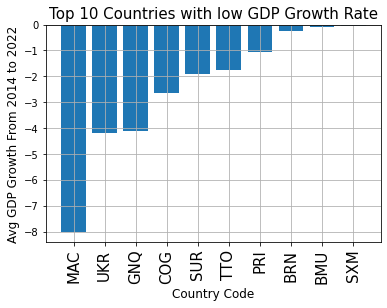

In [141]:
import matplotlib.pyplot as plt
gdpg = bottom_countries_by_avg_growth['avg_growth_2014_2022']
countries = list(bottom_countries_by_avg_growth.index)

fig,ax = plt.subplots(nrows=1,ncols=1)

ax.bar (countries,gdpg)

plt.xlabel('Country Code', fontsize=12) 
plt.ylabel('Avg GDP Growth From 2014 to 2022' , fontsize=12) 
plt.xticks(rotation= 'vertical',fontsize=15)
plt.title("Top 10 Countries with low GDP Growth Rate" ,fontsize=15)

ax.grid()
plt.show()

### e. Determine the top 10 countries with the greatest decrease in GDP growth from 2019 to 2020, indicating a high impact from the COVID-19 pandemic.

In the following coding snippet, I have the first sort of the data for the column rowth_diff_2019_2020 (this column calculated as 2020 - 2019 values) in descending order, which means the highest value at the top. We sliced the top ten rows from this, and this way, we got the top 10 that have a high COVID impact (for the immediate year 2019 and the COVID year 2020).

In [142]:
greatest_decrease_due_to_covid = gdp_subset.nsmallest(10, 'growth_diff_2019_2020')
greatest_decrease_due_to_covid

,Country Name,2014,2015,2016,2017,2018,2019,2020,2021,2022,avg_growth_2014_2022,growth_diff_2019_2020
Country Code,,,,,,,,,,,,
MAC,"Macao SAR, China",-2.048381,-21.514405,-0.679061,9.983306,6.464668,-2.511938,-54.235900,19.267056,-26.761423,-8.004009,-51.723962
MDV,Maldives,7.329626,2.884549,6.338301,7.209910,8.123129,7.097466,-33.492796,41.745101,12.299486,6.614975,-40.590262
TCA,Turks and Caicos Islands,8.711297,11.314834,7.251181,-2.490219,5.610956,5.324551,-26.782877,8.974508,-0.499485,1.934972,-32.107428
CPV,Cabo Verde,0.696667,0.936027,4.280715,4.551315,3.706965,7.636082,-19.302823,6.811176,17.714181,3.003367,-26.938904
SXM,Sint Maarten (Dutch part),1.580385,0.400000,0.500002,-5.800003,-6.599998,8.800000,-16.500000,7.300000,9.700000,-0.068846,-25.300000
LCA,St. Lucia,1.328003,0.101120,3.428673,3.387786,2.880376,-0.649970,-24.365712,12.231940,15.400000,1.526913,-23.715742
BHS,"Bahamas, The",1.847303,0.996801,-0.067013,2.415313,1.533237,-0.743978,-23.508176,16.984665,14.368960,1.536346,-22.764198
DMA,Dominica,4.753787,-2.731503,2.763648,-6.618995,3.547584,5.502483,-16.604912,6.891577,5.938928,0.382511,-22.107395
ATG,Antigua and Barbuda,3.795728,3.825293,5.496459,3.144638,6.823762,4.344060,-17.502185,6.554900,8.458733,2.771265,-21.846245


The displayed table lists the top 10 countries with the greatest decrease in GDP growth from 2019 to 2020, likely reflecting the impact of the COVID-19 pandemic. Macao SAR, China, shows the most significant decline, which may be due to its reliance on tourism and gaming industries that were heavily disrupted by the pandemic. The Maldives and Turks and Caicos Islands, known for their tourism sectors, also exhibit substantial declines, underscoring the vulnerability of economies dependent on international travel.

Other countries on the list, like Cabo Verde and Sint Maarten, have seen considerable drops, pointing to the widespread economic disruption caused by the pandemic. The presence of island nations on this list is notable and aligns with the global observation that the tourism industry faced one of the most immediate and severe impacts due to travel restrictions.



#### The following is the coding snippet of the plot of the top ten countries with a high COVID impact (for the immediate year 2019 and the COVID year 2020):

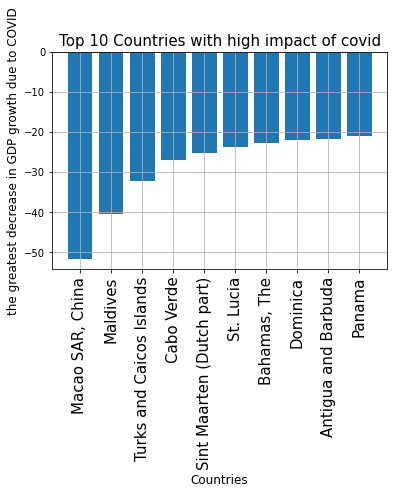

In [143]:
import matplotlib.pyplot as plt
gdpg = greatest_decrease_due_to_covid['growth_diff_2019_2020']
countries = greatest_decrease_due_to_covid['Country Name']

fig,ax = plt.subplots(nrows=1,ncols=1)

ax.bar (countries,gdpg)

plt.xlabel('Countries', fontsize=12) 
plt.ylabel('the greatest decrease in GDP growth due to COVID' , fontsize=12) 
plt.xticks(rotation= 'vertical',fontsize=15)
plt.title("Top 10 Countries with high impact of covid" ,fontsize=15)

ax.grid()
plt.show()

### f. Determine the top 10 countries with the smallest decrease or an increase in GDP growth from 2019 to 2020, indicating a low impact from the COVID-19 pandemic.

In the following coding snippet, I have the first sort of the data for growth_diff_2019_2020 (this column is calculated as 2020 - 2019 for values) in ascending order, which means the highest value is at the top. We sliced the top ten rows from this, and this way, we got the top 10 that have a less COVID impact (for the immediate year 2019 and the COVID year 2020).

In [144]:
least_decrease_due_to_covid = gdp_subset.nlargest(10, 'growth_diff_2019_2020')
least_decrease_due_to_covid

,Country Name,2014,2015,2016,2017,2018,2019,2020,2021,2022,avg_growth_2014_2022,growth_diff_2019_2020
Country Code,,,,,,,,,,,,
GUY,Guyana,1.686028,0.687521,3.807919,3.734374,4.441014,5.352627,43.479556,20.060011,57.800220,15.672141,38.126929
TLS,Timor-Leste,4.471960,2.763219,3.382977,-3.057649,-0.690257,23.513793,31.914489,5.291442,-17.491194,5.566531,8.400696
IRN,"Iran, Islamic Rep.",4.984775,-1.424885,8.815087,2.758505,-2.253864,-2.658207,3.330288,4.719778,2.749166,2.335627,5.988495
GNQ,Equatorial Guinea,0.415066,-9.110041,-8.816417,-5.667509,-6.236544,-5.481825,-4.241481,-0.945383,3.145798,-4.104260,1.240344
TUR,Turkiye,4.939715,6.084487,3.323084,7.501997,2.979885,0.783610,1.940032,11.353496,5.565860,4.941352,1.156422
NIC,Nicaragua,4.785816,4.792057,4.562340,4.631410,-3.363187,-2.896488,-1.766258,10.346898,3.751103,2.760410,1.130230
STP,Sao Tome and Principe,6.549935,3.911338,4.164769,3.848981,2.945269,2.210856,3.024568,1.877923,0.927137,3.273420,0.813712
IRL,Ireland,8.649351,24.370445,2.006654,9.005342,8.527541,5.440937,6.184538,13.588247,11.969580,9.971404,0.743601
KIR,Kiribati,-1.096289,9.865175,-0.478197,0.186027,5.113636,-2.162162,-1.657459,7.865169,1.562500,2.133156,0.504704


Guyana stands out with a significant increase, which could be attributed to its newly established oil production boosting its economy amidst global downturns. Timor-Leste and Iran also show positive growth differentials despite the pandemic, suggesting economic resilience or successful mitigation strategies during this period.

Equatorial Guinea, despite having a negative growth rate in 2020, had a smaller drop compared to other countries, reflecting a less severe impact from the pandemic. Turkey, Nicaragua, and Sao Tome and Principe managed to maintain positive growth rates, pointing towards effective economic management or sectorial composition that could withstand the pandemic's challenges better than others.

Ireland's minimal growth rate change suggests a strong economy capable of weathering global shocks. Kiribati and Paraguay, with their lower economic complexity, may not have been as exposed to the global economic disruptions caused by COVID-19, hence the smaller impact on their GDP growth rates.

#### The following is the coding snippet of the plot of the top ten countries with a low COVID impact (for the immediate year 2019 and the COVID year 2020):

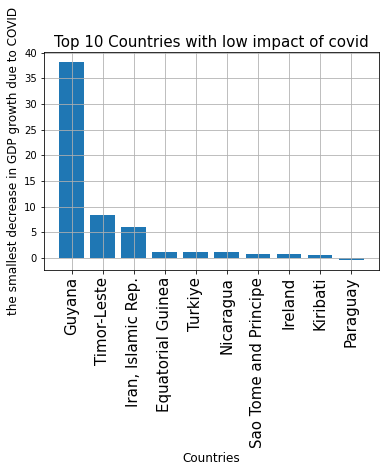

In [145]:
import matplotlib.pyplot as plt
gdpg = least_decrease_due_to_covid['growth_diff_2019_2020']
countries = least_decrease_due_to_covid['Country Name']

fig,ax = plt.subplots(nrows=1,ncols=1)

ax.bar (countries,gdpg)

plt.xlabel('Countries', fontsize=12) 
plt.ylabel('the smallest decrease in GDP growth due to COVID' , fontsize=12) 
plt.xticks(rotation= 'vertical',fontsize=15)
plt.title("Top 10 Countries with low impact of covid" ,fontsize=15)

ax.grid()
plt.show()

### g. How did countries' GDP growth rates in 2021 compare to pre-pandemic levels in 2019, indicating economic recovery?


The code snippet calculates the 'Recovery' value by comparing GDP growth rates of 2019 and 2021, revealing how economies rebounded post-pandemic. Positive values signal recovery or growth, while negative values indicate ongoing economic challenges.

In [146]:
gdp_subset['Recovery'] = gdp_subset['2021'] - gdp_subset['2019']
recovery_series = gdp_subset[['Country Name', 'Recovery']]
recovery_series

,Country Name,Recovery
Country Code,,
AFE,Africa Eastern and Southern,2.247161
AFW,Africa Western and Central,0.768441
AGO,Angola,1.901483
ALB,Albania,6.820816
AND,Andorra,6.271652
...,...,...
WSM,Samoa,-11.536447
XKX,Kosovo,5.988781
ZAF,South Africa,4.609643


The presented analysis offers a comprehensive overview of the global economic landscape in the aftermath of the COVID-19 pandemic. It reveals a complex picture of recovery, with some countries showcasing remarkable resilience and others grappling with prolonged economic downturns. This differential recovery underscores the multifaceted impacts of the pandemic, influenced by factors such as governmental response, economic structure, and healthcare capacity. The data also sheds light on underlying vulnerabilities and strengths within economies, providing valuable insights for policymakers and stakeholders as they navigate the path to recovery and seek to build more resilient economic systems for the future.

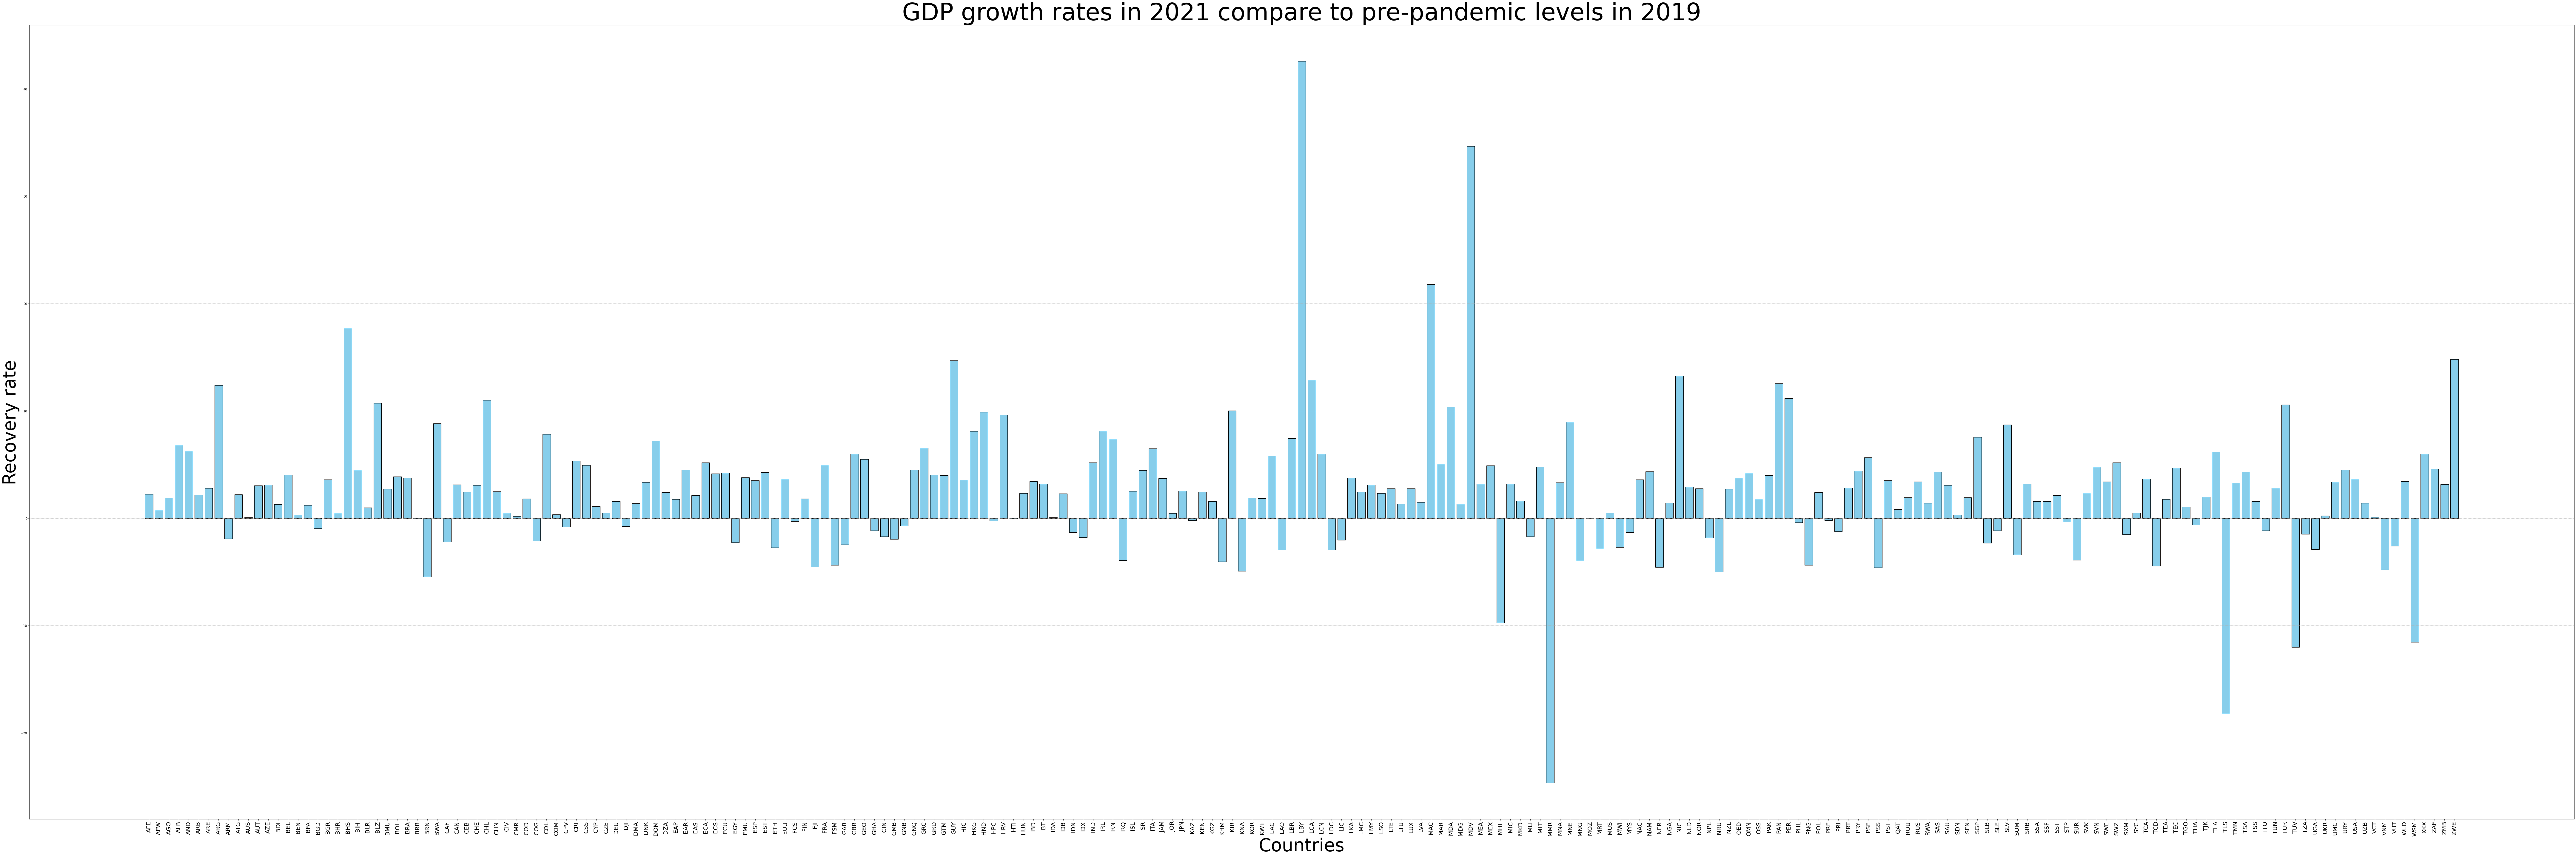

In [147]:
import matplotlib.pyplot as pit
rec = gdp_subset['Recovery']
countries = list(gdp_subset.index)
fig,ax = plt. subplots(nrows=1,ncols=1,figsize=(120,40))

ax.bar(countries, rec, color='skyblue', edgecolor='black')

pit.xlabel('Countries', fontsize=60)
plt.ylabel('Recovery rate', fontsize=60) 
pit.xticks(rotation=90,fontsize=20)
pit.title("GDP growth rates in 2021 compare to pre-pandemic levels in 2019",fontsize=80)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The bar graph represents the GDP growth rates in 2021 compared to pre-pandemic levels in 2019 for a selection of countries. Each bar reflects the recovery rate, with positive values indicating growth compared to 2019 and negative values indicating a contraction. The graph allows for a quick visual assessment of economic recovery post-pandemic, with some nations rebounding stronger and others still struggling to reach their pre-pandemic economic performance.

### h.What is the distribution of GDP growth rates across all countries in the most recent year available? Identify the median, quartiles, and any outliers.

In the following coding snippet, the .describe() method is applied to the GDP growth rates of countries for the year 2022. This statistical summary provides insights into the central tendency and dispersion of GDP growth rates across 233 countries. The average (mean) growth rate stands at approximately 4.06%, with a standard deviation of 5.88, indicating a broad spread of growth rates around the mean. The minimum and maximum growth rates are -29.10% and 57.80% respectively, highlighting the extreme variances in economic performance. The 25th, 50th (median), and 75th percentiles reveal that half of the countries had a growth rate of 3.75% or lower, and a quarter had a rate exceeding 5.57%.

In [148]:
latest_year = '2022'
distribution = gdp_subset[latest_year].describe()
distribution

count    233.000000
mean       4.063898
std        5.880826
min      -29.100000
25%        2.562394
50%        3.751103
75%        5.565860
max       57.800220
Name: 2022, dtype: float64

#### The following is the coding snippet of the plot of the distribution of GDP growth rates across all countries in 2022:

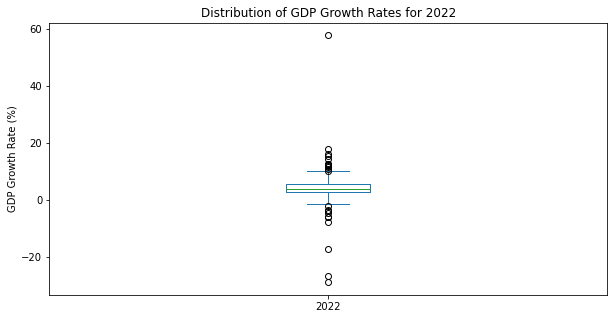

In [149]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
gdp_df[latest_year].plot(kind='box')
plt.title(f'Distribution of GDP Growth Rates for {latest_year}')
plt.ylabel('GDP Growth Rate (%)')
plt.show()


The GDP growth rates for 2022 show an average increase of around 4.06%, with the growth rates spread widely, as indicated by a high standard deviation. The range of growth spans from a sharp contraction at -29.10% to a high growth peak at 57.80%. The median rate of 3.75% suggests that half of the countries have lower growth rates and the other half higher, indicating varied economic conditions worldwide.







### Conclusion

Based on the analysis conducted on the global GDP growth data from the World Bank, several insights have emerged:

1. The global GDP growth rate has varied significantly over the past several years, with some nations rebounding strongly and others still struggling to reach their pre-pandemic economic performance.

2. High GDP growth rates exceeding 10% in 2022 were observed in a select group of countries, suggesting pockets of robust economic activity and recovery.

3. Conversely, several countries experienced negative growth rates in 2022, highlighting the uneven economic impact and recovery trajectories worldwide, possibly due to varying responses to the COVID-19 pandemic and other socio-economic factors.

4. The top 10 countries with the highest average GDP growth from 2014 to 2022 include emerging economies, which may indicate a shift towards more dynamic economic activities in these regions.

5. The countries with the lowest average growth in the same period reflect economic challenges, including political instability, reliance on commodities with fluctuating prices, and systemic issues that hamper growth.

6. The comparison between the GDP growth rates of 2019 and 2021 for each country provides a narrative of recovery, showing how some countries have surpassed pre-pandemic levels, indicating a strong economic bounce back, while others have not yet recovered.

7. The distribution of GDP growth rates for the year 2022 demonstrates the variance in economic conditions across countries, with a median growth rate that offers a more balanced view of global economic health, mitigating the effect of extreme values.

In conclusion, the data analysis reveals a world economy in flux, with varying degrees of success in navigating the post-pandemic landscape. While some countries have shown remarkable resilience and growth, others still face significant economic challenges. The insights from this project could be valuable for policymakers, investors, and international organizations in understanding the current economic climate and in making informed decisions for future economic strategies.